## Rachael DATA CHALLENGE

you are provided with a dataset containing the characteristics of different mushrooms (*mushrooms.csv*), and are tasked with discovering whether a mushroom is poisonous (class=p) or edible (class=e). You also have a dataset (*mushrooms_validation.csv*) where mushrooms are not labeled : run your algorithm on this dataset and provide a *predicted_labels.csv* file (keeping the indexes in *mushrooms_validation.csv*).

As you implement your code, answer the following questions:
1) how do you deal with missing data?
2) how would you predict the values of the class column?
3) what features are the most important in predicting the class of a mushroom?
4) what would you say is the most important metric in assessing your model performance? Accuracy, precision, recall...?
5) how would selecting only three features to use in a model impact performance? Is this acceptable?

# Configuration and Imports

---
I decided to load the csv file with pandas dataframe.


In [ ]:
# Pandas and numpy for data manipulation as we use it many times with alias 'pd', 'np'
import pandas as pd
import numpy as np

# Matplotlib and seaborn visualization
import matplotlib.pyplot as plt
import seaborn as sn

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# As we see in the class we use this line of the code in order to show the figures inline.
%matplotlib inline 

# Set default font size
plt.rcParams['font.size'] = 15

# during the hyper parameter tuning I face many messy warning which make me a little bit unhappy. because
# could not focus on the measure or report of my model selection. I had to scroll too much. By searching into
# the we I found this line of the code. 
import warnings
warnings.filterwarnings('ignore')
# - ignore is to hide the warning
# - always is to show the warning


#  1. Data Acquisition and Preprocessing
<hr/>
This is the first step we need to accomplish before going any further. The dataset will be downloaded and loaded as usual. 
Some preprocessing such as checking the missing values and duplication will be addressed.

## Load the dataset
We use Pandas dataframe to read and load the our dataset.

In [ ]:
dataFrame = pd.read_csv(filepath_or_buffer="/content/mushrooms.csv", 
                        sep=',',
                        index_col= None)

## Dataset Structure 
We are going to see some usefull information about the dataset like : 
**Number of rows and columns** (so-called dataset shape).

In [ ]:
row_number, col_number = dataFrame.shape
print(f'The dataset contains \'{row_number}\' rows.')
print(f'The dataset also has \'{col_number}\' columns')

The dataset contains '7625' rows.
The dataset also has '23' columns


We are going to take a look at the dataset.

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                7625 non-null   int64 
 1   class                     7625 non-null   object
 2   cap-shape                 7236 non-null   object
 3   cap-surface               7241 non-null   object
 4   cap-color                 7239 non-null   object
 5   bruises                   7237 non-null   object
 6   odor                      7251 non-null   object
 7   gill-attachment           7260 non-null   object
 8   gill-spacing              7240 non-null   object
 9   gill-size                 7242 non-null   object
 10  gill-color                7237 non-null   object
 11  stalk-shape               7249 non-null   object
 12  stalk-surface-above-ring  7251 non-null   object
 13  stalk-surface-below-ring  7243 non-null   object
 14  stalk-color-above-ring  

We are going to take a look at the dataset.

In [ ]:
dataFrame.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,NaN,c,NaN,...,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,NaN,c,b,...,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,...,s,w,w,NaN,w,NaN,e,n,a,g


Summary statistics of the dataset. 

In [ ]:
dataFrame.describe()

,Unnamed: 0
count,7625.000000
mean,3812.000000
std,2201.292234
min,0.000000
25%,1906.000000
50%,3812.000000
75%,5718.000000
max,7624.000000


## Preprocessing/Cleaning

In this section we go through these processes: 
* Checking duplicate records
* How to deal with records with missing values included (imputation/drop)
* Checking unique values for each column


## Check duplicate/missing values

Checking for duplicated records in the dataset. 

In [ ]:
dataFrame[dataFrame.duplicated()].sum()

Unnamed: 0                  0.0
class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

As we can see above, we **don't have any** duplicated record in the dataset. 

### Checking for missing values

Checking for records that are containing missing values. 

In [ ]:
null_columns = dataFrame.columns[dataFrame.isnull().any()]

print('List of columns consisting null values and their quantity:')
print(dataFrame[null_columns].isnull().sum())


List of columns consisting null values and their quantity:
cap-shape                   389
cap-surface                 384
cap-color                   386
bruises                     388
odor                        374
gill-attachment             365
gill-spacing                385
gill-size                   383
gill-color                  388
stalk-shape                 376
stalk-surface-above-ring    374
stalk-surface-below-ring    382
stalk-color-above-ring      379
stalk-color-below-ring      376
veil-type                   386
veil-color                  378
ring-number                 385
ring-type                   386
spore-print-color           383
population                  387
habitat                     391
dtype: int64


Visualizing the missed values in the whole dataset. 

Text(0.5, 1.0, 'Missing Visualization')

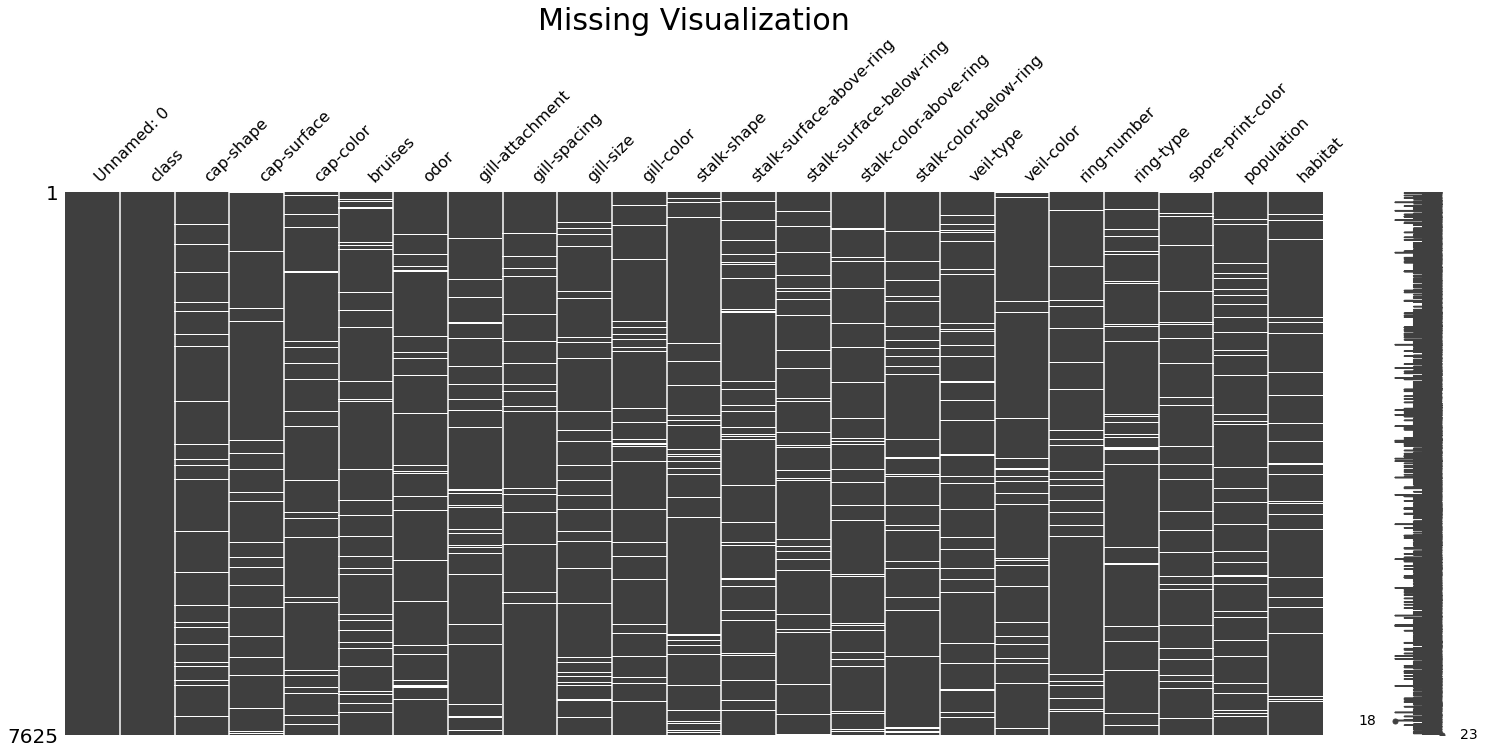

In [ ]:
import missingno as msno
msno.matrix(dataFrame)
plt.title('Missing Visualization', fontsize=30)

### handle the missing values by imputing
We check what is the percentage of the all records that having missing values with respect to all the records in the dataset. 

In [ ]:
def missing_percent(df):
        mis_val = df.isnull().sum()
        mis_percent = 100 * df.isnull().sum() / len(df)
        mis_table = pd.concat([mis_val, mis_percent], axis=1)
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")
        return mis_columns

In [ ]:
missing_percent(dataFrame)

Your selected dataframe has 23 columns.
There are 21 columns that have missing values.


,Missing Values,Percent of Total Values
habitat,391,5.13
cap-shape,389,5.10
gill-color,388,5.09
bruises,388,5.09
population,387,5.08
cap-color,386,5.06
veil-type,386,5.06
ring-type,386,5.06
gill-spacing,385,5.05
ring-number,385,5.05


## Handling missing values 
We will handle missing values in two approaches: 
1. **Imputation** (completing missing values via imputation)
2. **Drop** (dropping records that are containing missing values)

### 1. **Imputation**

In imputation approach, we will try to **fill the missed values** by putting **the most common class in the column** of the missed value. 

In [ ]:
# Creating a copy of data set to be used for imputation method
df_imputed = dataFrame.copy()

In [ ]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df_imputed = df_imputed.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_imputed

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7620,7620,p,k,s,n,f,y,f,c,n,...,s,w,w,p,w,o,e,w,v,l
7621,7621,p,k,y,n,f,y,f,c,n,...,s,w,p,p,w,o,e,w,v,l
7622,7622,e,b,f,g,f,n,f,w,b,...,s,w,w,p,w,t,p,w,n,g
7623,7623,e,k,s,w,f,n,f,w,b,...,s,w,w,p,w,t,p,w,s,g


Now we will check how are the results after performing imputation on our columns.


In [ ]:
df_imputed.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see from the results above, we didn't miss any records but we filled all the missed values. 

# 2. Data Exploration and analysis

Before starting with learning pipline of any  modeling technique, the best practice is  to explore your dataset and calculate a few statistics from your data. In addition, drawing specific plots may help us spot interesting facts like correlations, outliers and etc.

### Checking For Balancing
---

Here we will check if the dataset is balanced or not. 

In [ ]:
df_imputed['class'].value_counts()

e    3968
p    3657
Name: class, dtype: int64

In [ ]:
df_imputed["class"].unique()

array(['p', 'e'], dtype=object)

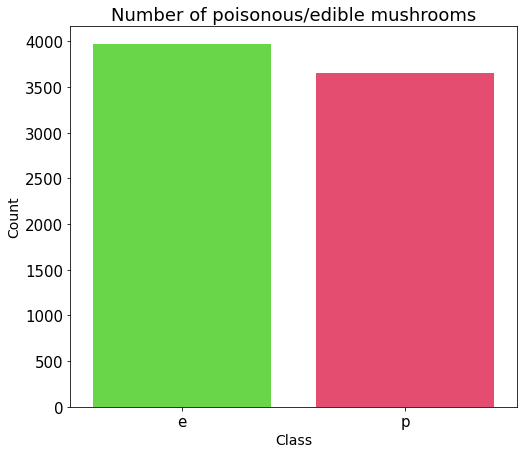

In [ ]:
import seaborn as sns
counts = df_imputed['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(counts.index, counts.values, alpha=0.8, palette="prism")
plt.ylabel("Count", fontsize=14)
plt.xlabel("Class", fontsize=14)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

* **Note:** 
 As it can be seen from the figure above, our target feature seems to be balanced. Without having a balanced dataset, using simpler metrics like accuracy_score can be misleading. 

### Encoding the data
---

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                7625 non-null   int64 
 1   class                     7625 non-null   object
 2   cap-shape                 7625 non-null   object
 3   cap-surface               7625 non-null   object
 4   cap-color                 7625 non-null   object
 5   bruises                   7625 non-null   object
 6   odor                      7625 non-null   object
 7   gill-attachment           7625 non-null   object
 8   gill-spacing              7625 non-null   object
 9   gill-size                 7625 non-null   object
 10  gill-color                7625 non-null   object
 11  stalk-shape               7625 non-null   object
 12  stalk-surface-above-ring  7625 non-null   object
 13  stalk-surface-below-ring  7625 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# changing the data type from string to category
df_imputed = df_imputed.astype('category')

In [ ]:
# encoding the dataframe using labelencoder 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in df_imputed.columns:
    df_imputed[column] = labelencoder.fit_transform(df_imputed[column])


In [ ]:
df_imputed.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,4,0,5,2,3,0,5,1,1,0,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
df_imputed.dtypes

Unnamed: 0                  int64
class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

I dropped Unnamed column, because it would be useless 

In [ ]:
df_imputed.drop(["Unnamed: 0"], axis = 1, inplace = True)

### Each Column Distribution

Here we will check the distribution of the values in each column of the dataset. 

In [ ]:
row_number, col_number = df_imputed.shape
print(f'The dataset contains \'{row_number}\' rows.')
print(f'The dataset also has \'{col_number}\' columns')

The dataset contains '7625' rows.
The dataset also has '22' columns


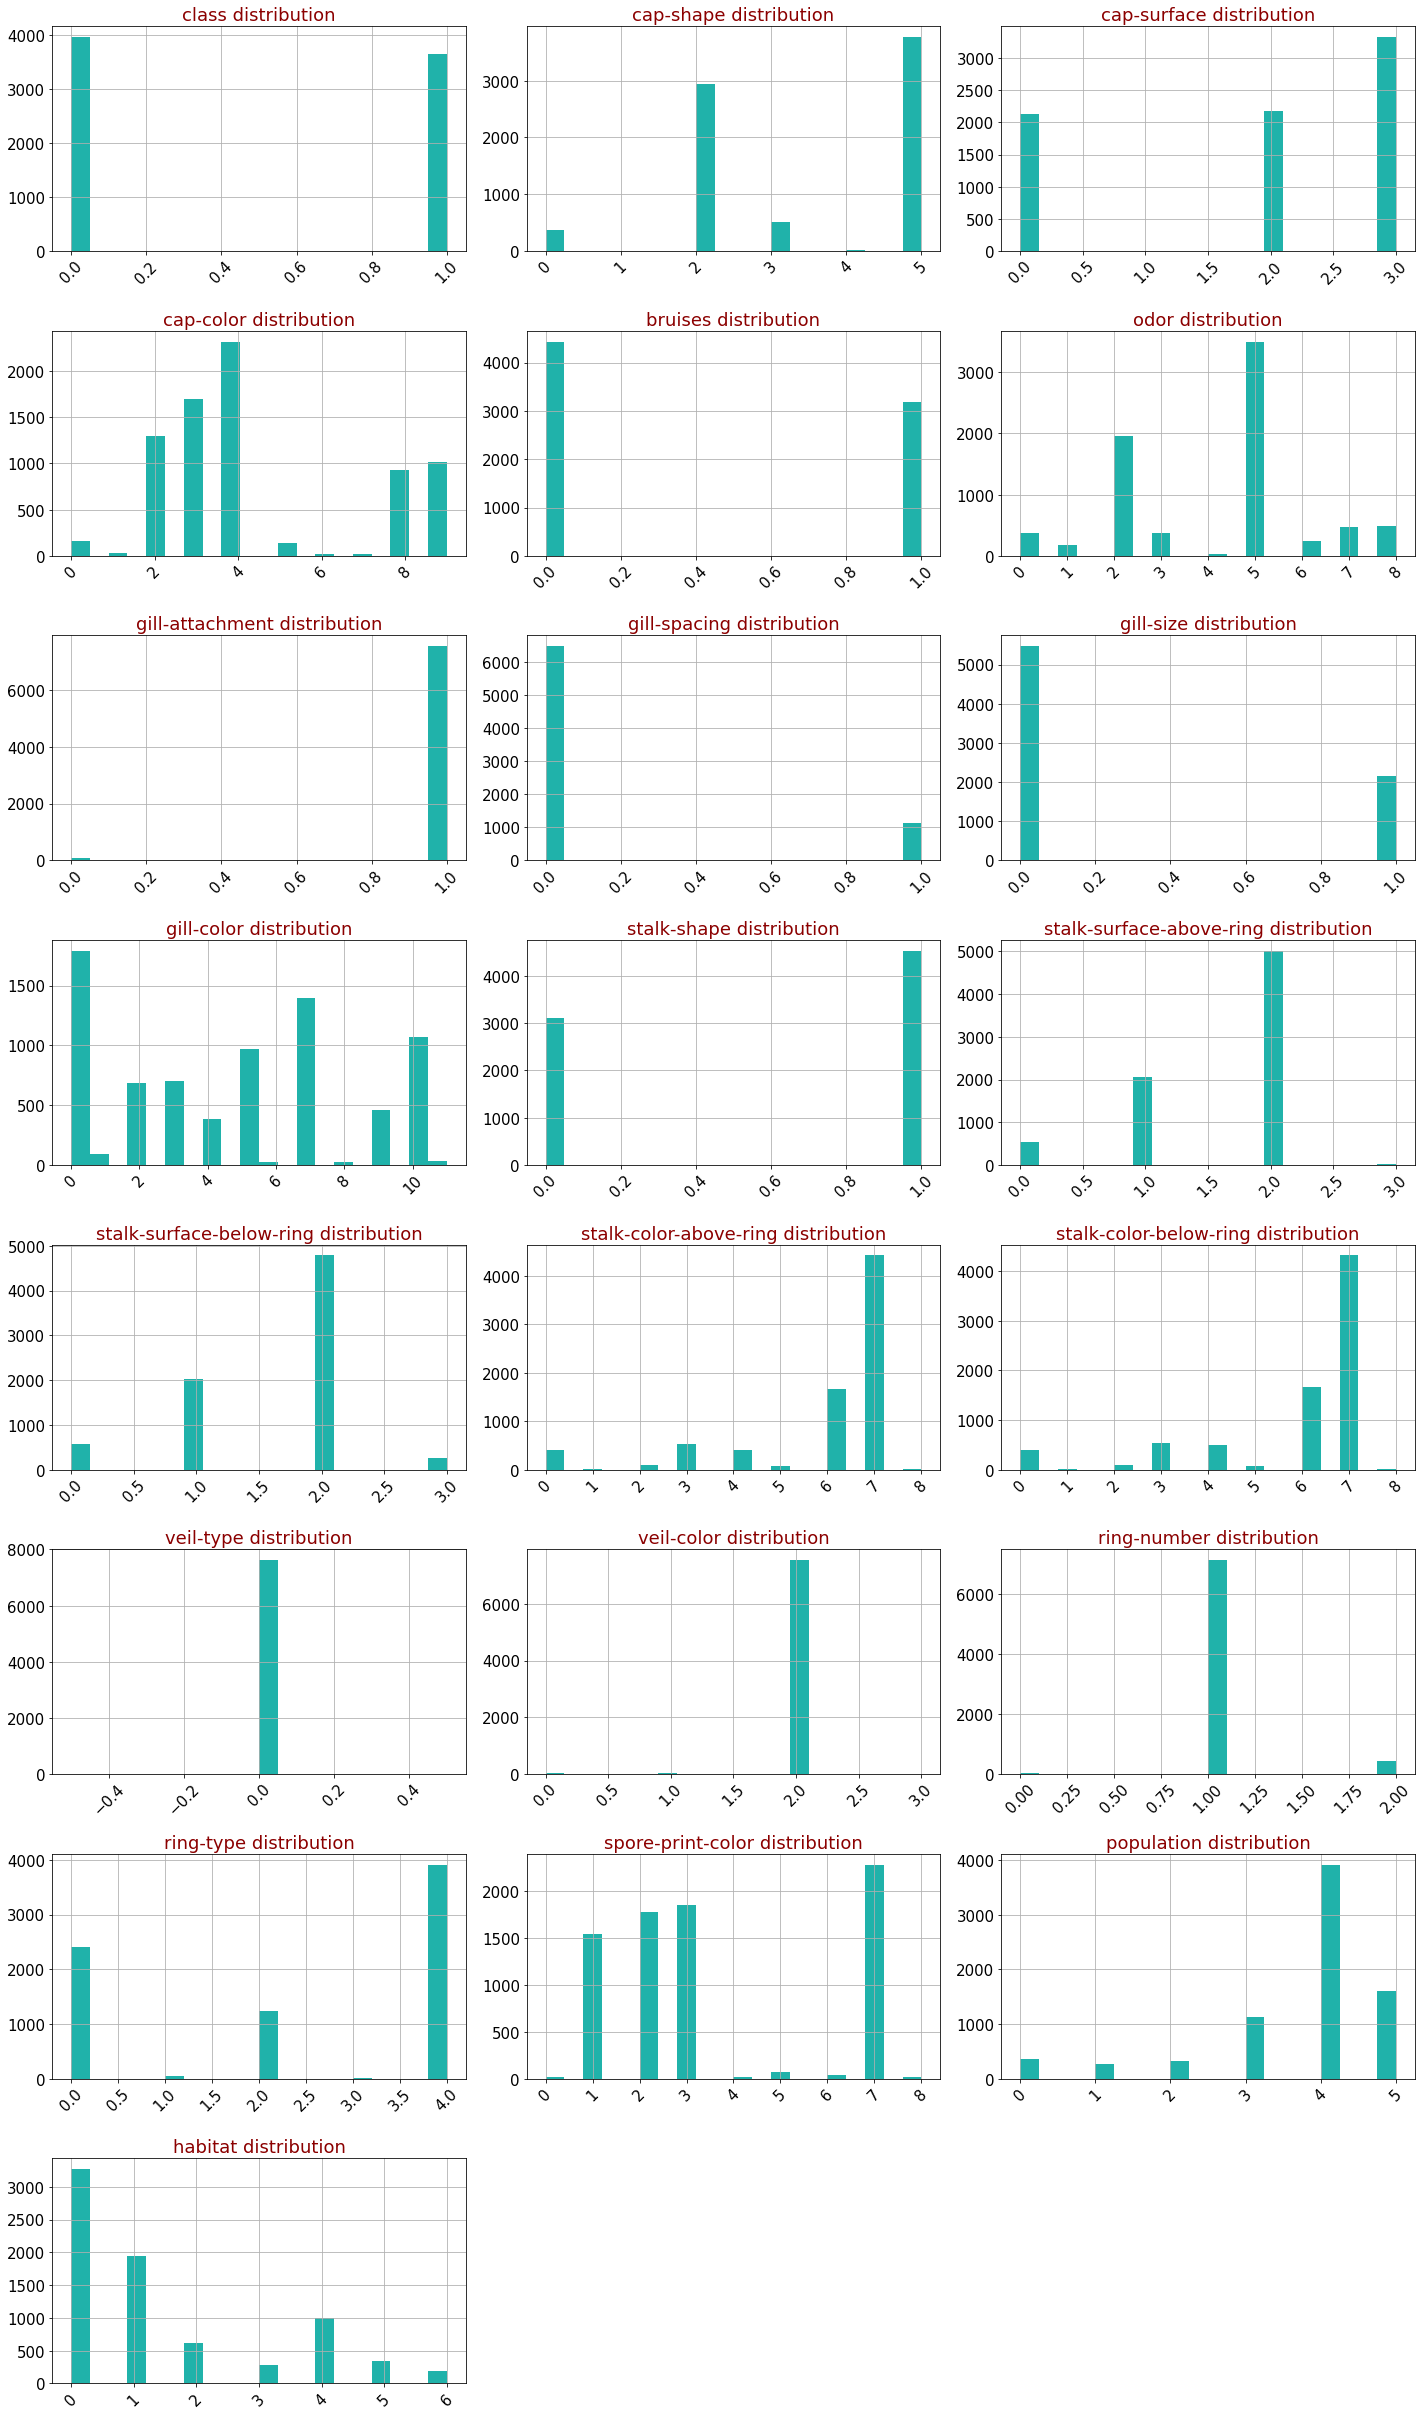

In [ ]:
fig=plt.figure(figsize=(20,80))

for index, column in enumerate(df_imputed.columns):
    ax=fig.add_subplot(19,3,index+1)
    df_imputed[column].hist(bins=20,ax=ax,facecolor='LightSeaGreen')
    plt.xticks(rotation = 45)
    ax.set_title(column + " distribution",color='darkred')
  
fig.tight_layout()  
plt.savefig('/content/distribution.png')
plt.show()


Seeing the plots above we can say: 
* **'veil-type'** feature should be dropped because it has only one unique value. 
* **'veil-color'** and **'gill-attachment'** have an unblanced distribution for unique values.
* Let's go for going deeper into these features to make decision. 


In [ ]:
df_imputed['veil-type'].value_counts()

0    7625
Name: veil-type, dtype: int64

In [ ]:
df_imputed['veil-color'].value_counts()

2    7540
0      41
1      38
3       6
Name: veil-color, dtype: int64

In [ ]:
df_imputed['gill-attachment'].value_counts()

1    7536
0      89
Name: gill-attachment, dtype: int64

I decided to keep two latter features, but drop the "veil-type" because it would be useless in our model.

## Features' distributions w.r.t Class('target') 

We will check what is the distribution of **the values in our features** with respect to our **target values** ('**CLASS**')

In [ ]:
# This function given some columns of the dataset, will plot the 
# distribution of the values in those columns with respect to the target values. 
def custom_countplot(df, columns, n_cols= 2):
  """
    Args:
      - df: the input dataframe
      - column: the column name in `df` to be counted w.r.t `target`
    Return:
      - None
  """
  fig, axes = plt.subplots(1, n_cols, figsize=(18,10))

  for index,column in enumerate(columns): 
      ax = sn.countplot(x='class',hue=column ,ax=axes[index],data=df,palette = 'Set1')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
      
      for p in ax.patches:
        percentage = (p.get_height()/len(df)*100).round(1)
        txt = str(percentage)+'%'
        txt_x = p.get_x() 
        txt_y = p.get_height() + 30
        ax.text(txt_x,txt_y,txt)
        
  fig.tight_layout(pad=1.5)

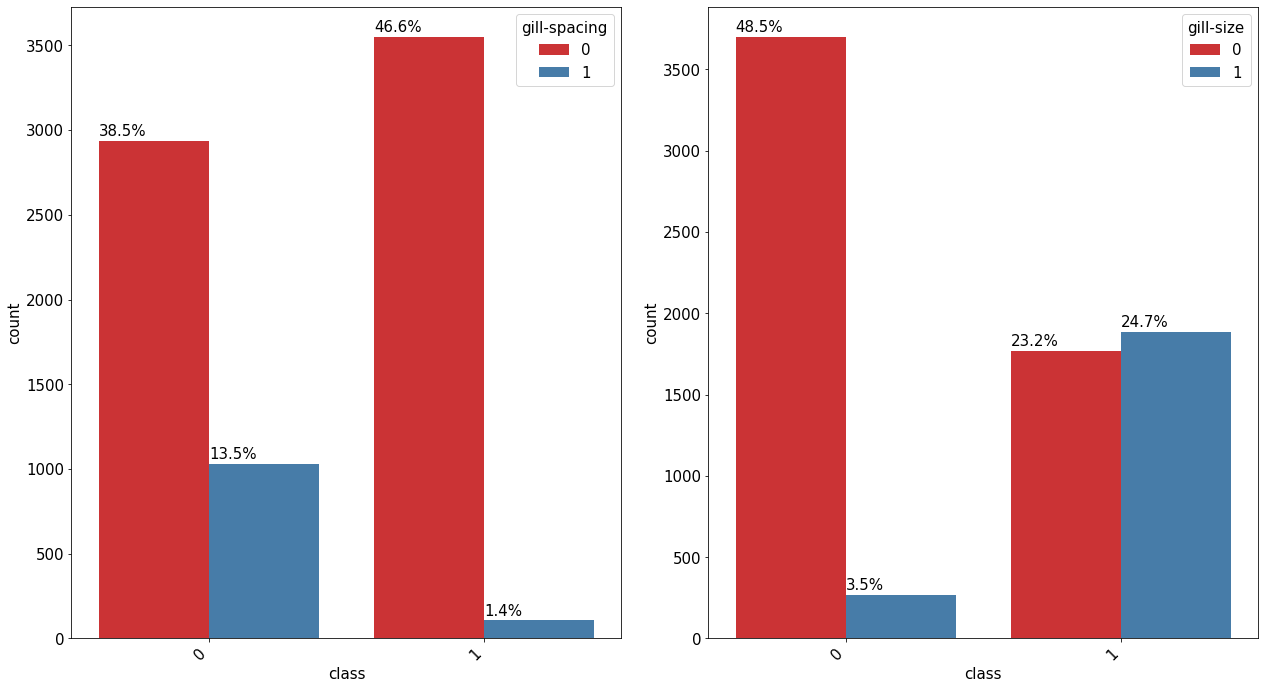

In [ ]:
custom_countplot(df_imputed, df_imputed.columns[7:9])

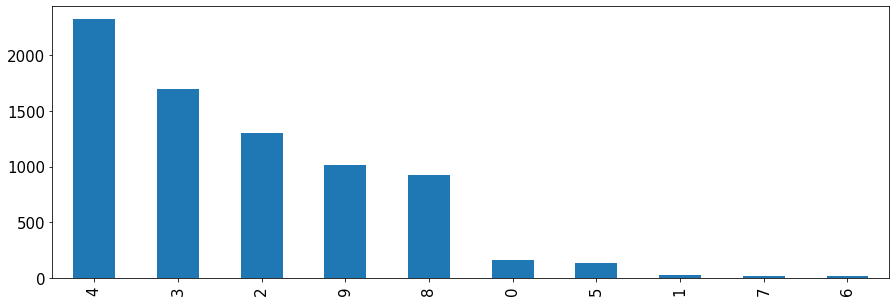

In [ ]:
# bar plot for cap-color value counts
plt.figure(figsize=(15,5))
df_imputed['cap-color'].value_counts().plot.bar()

## Correlation Between Features
Checking which features are **correlated** with **each other** and/or the **target** variable

In [ ]:
# sn.pairplot(df_imputed, hue='target')

### Correlation Between Features
Checking which features are correlated with each other and/or the **target** variable using a heatmap.


if two features are **highly correlated** to each other we can predict one from the other one. Therefore, if we had two features that are highly correlated, we can drop one of those features accordingly.

In [ ]:
df_imputed = df_imputed.rename(columns={'class': 'target'})

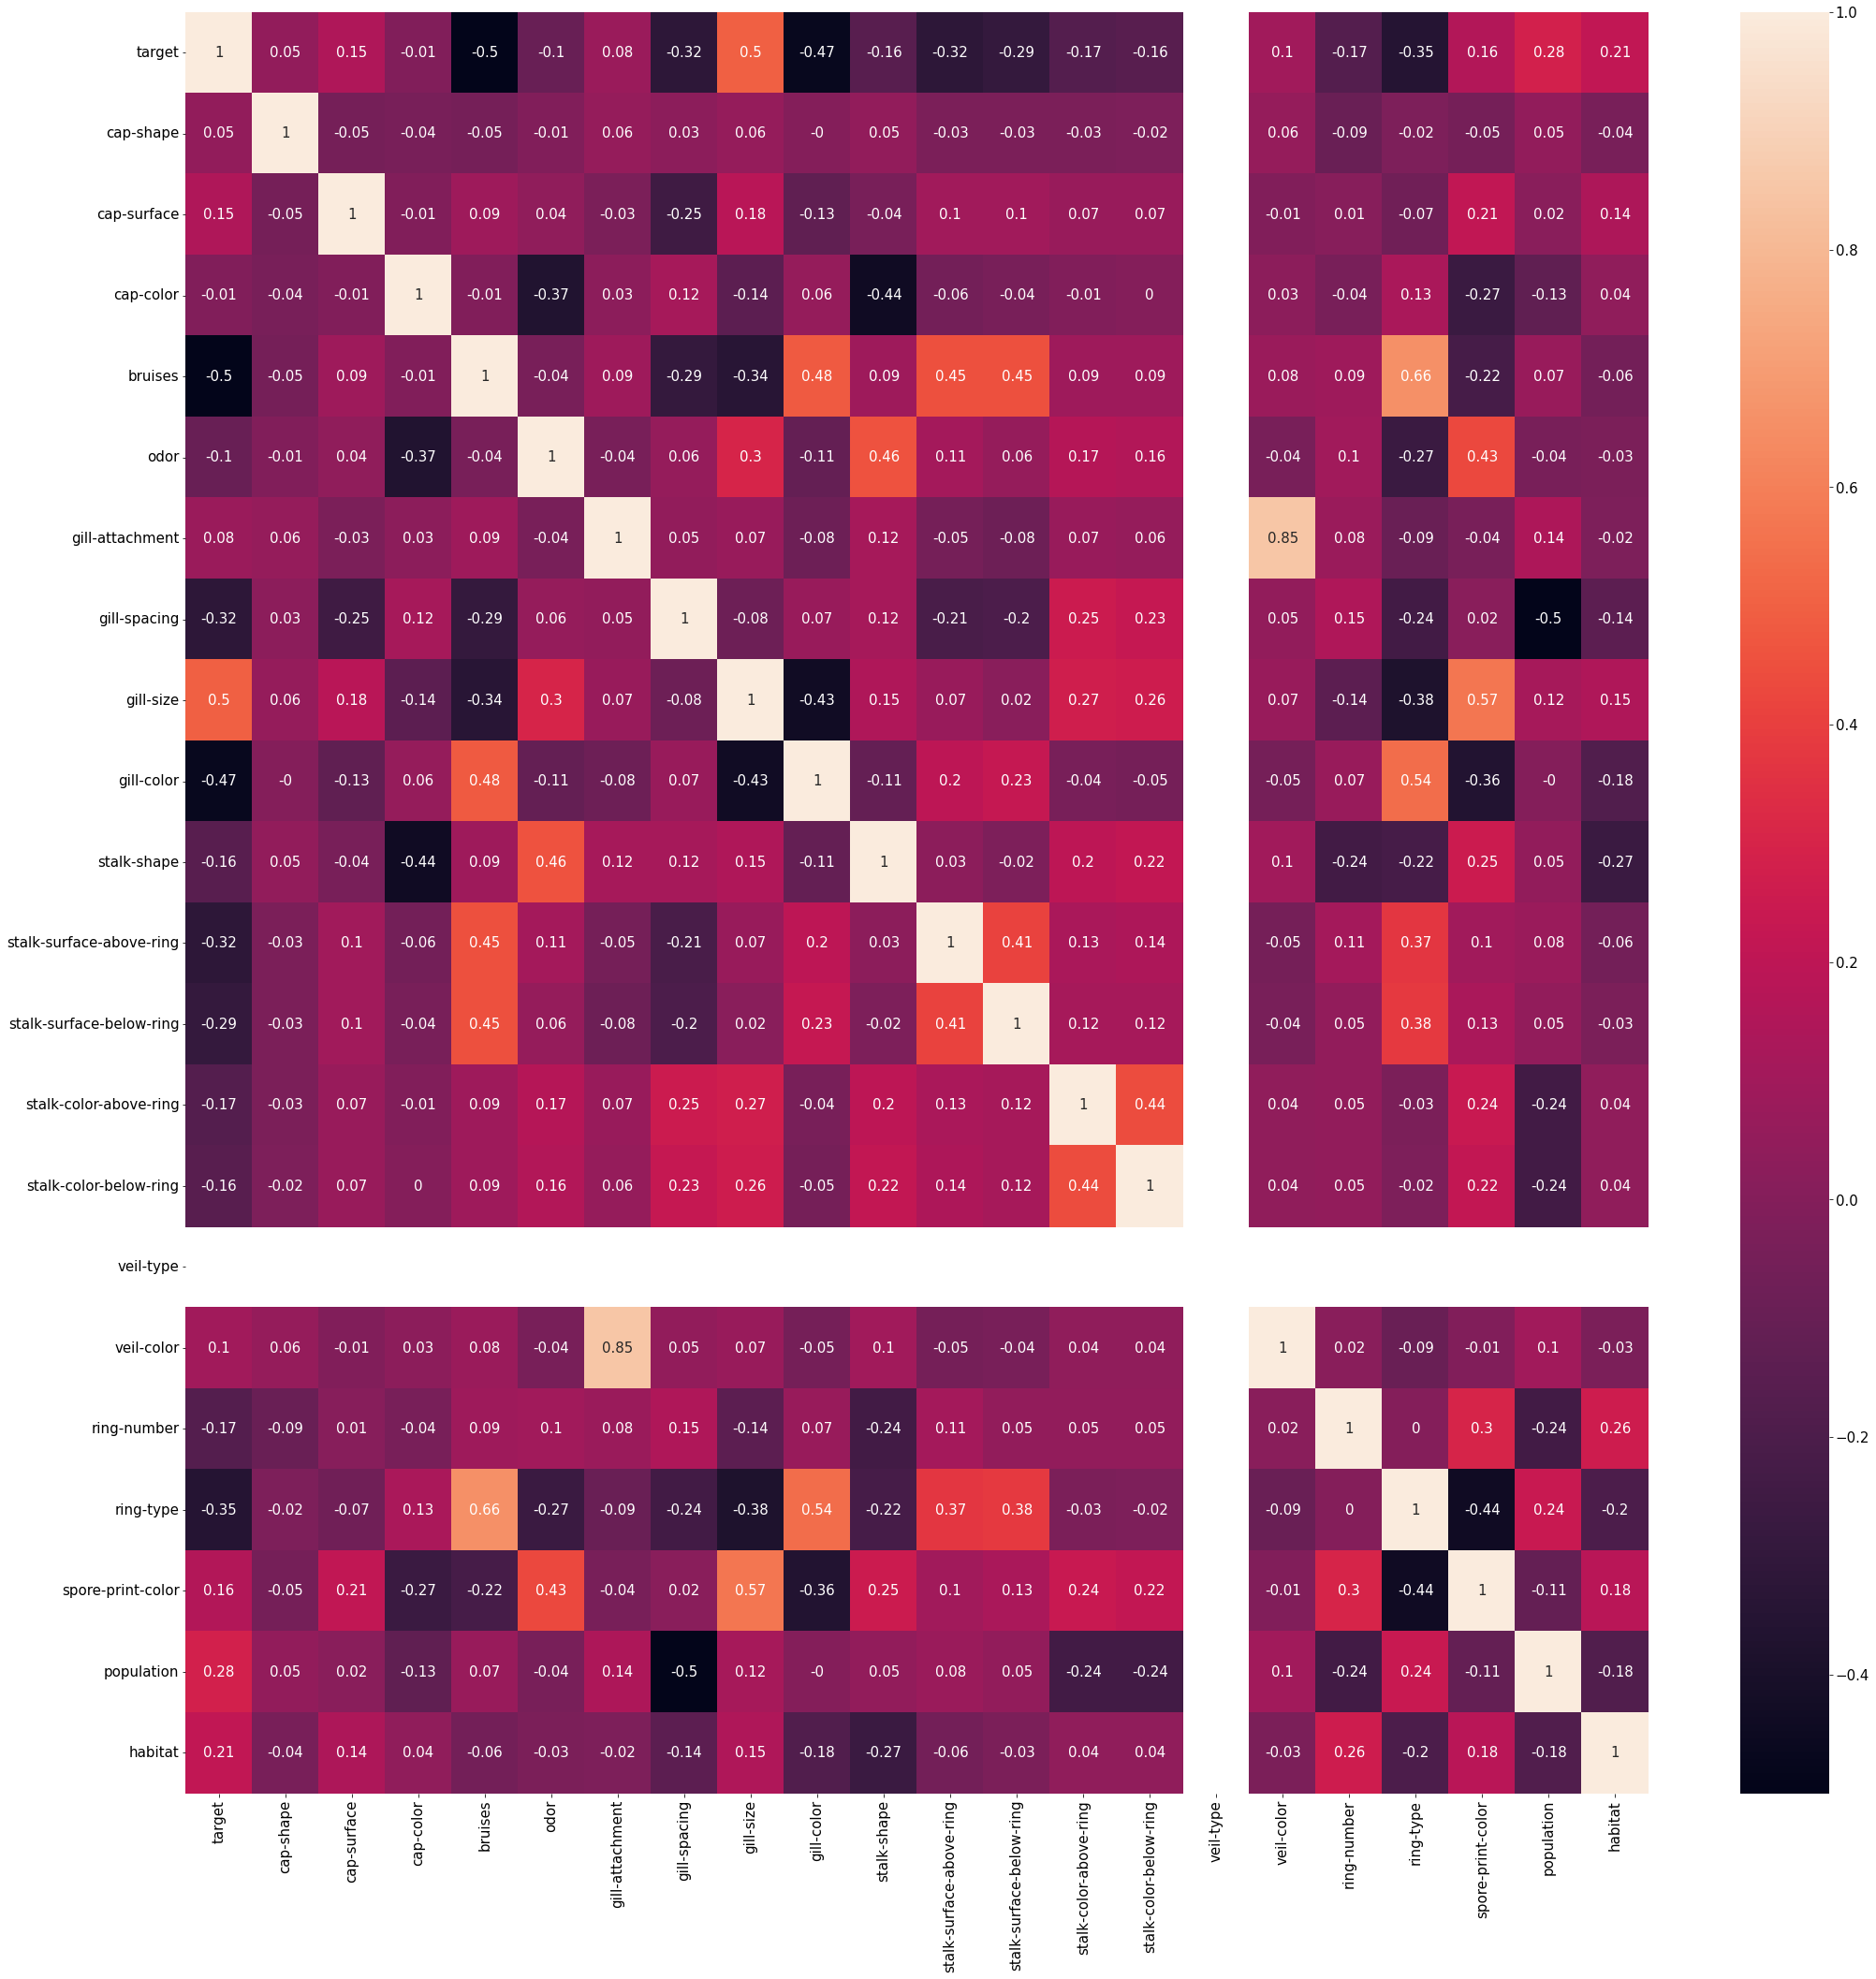

In [ ]:
# This function given the dataset and its target value will produce 
# a heatmap which shows the correlation between each column parwise
# and also the target value. 
def corr(dataframe,target_variable):

    fig, ax = plt.subplots(figsize=(35,35))
    correlation_matrix = dataframe.corr().round(2)
    sn.heatmap(data=correlation_matrix, annot=True)

    
corr(df_imputed,"target")

We can interpret these numbers in this way: 
1. **Strong correlation**: If the correlation degree lies between **± 0.50 and ± 1**
2. **Medium correlation**: If the correlation degree lies between **± 0.30 and ± 0.49**
2. **Small correlation**: If the correlation degree lies between **± 0.29 and 0**

* **Observations:**
  1. As we can see in the feature above, we don't have two features that are highly correlated to each other. (**we can not drop some of the features**)
  2. Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.47 and "bruises" has -0.50 so let's look at them closely.
  3. "gill-attachment" with "veil-color" features have a high correlation, so we can ignor one of them.
  
  

In [ ]:
df_imputed[['target', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='target', ascending=False)

,gill-color,target
8,8,1.000000
0,0,0.886655
3,3,0.726753
2,2,0.693314
7,7,0.440629
11,11,0.406250
10,10,0.206735
4,4,0.156658
5,5,0.110766
9,9,0.093682


#### Let's look closely at the feature "gill-color".

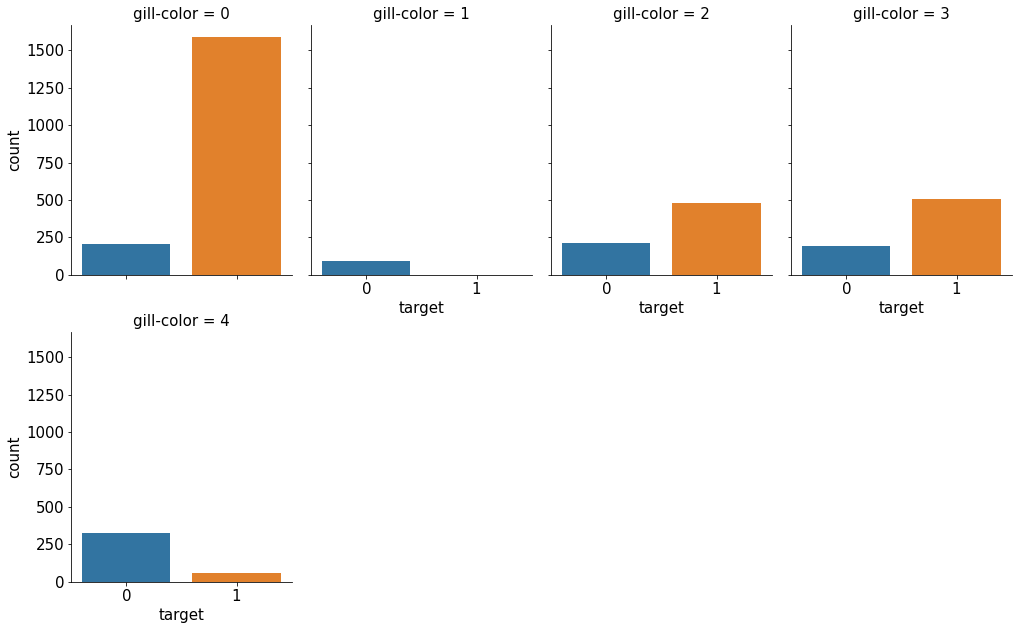

In [ ]:
new_var = df_imputed[['target', 'gill-color']]
new_var = new_var[new_var['gill-color']<=4]
sns.factorplot('target', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);


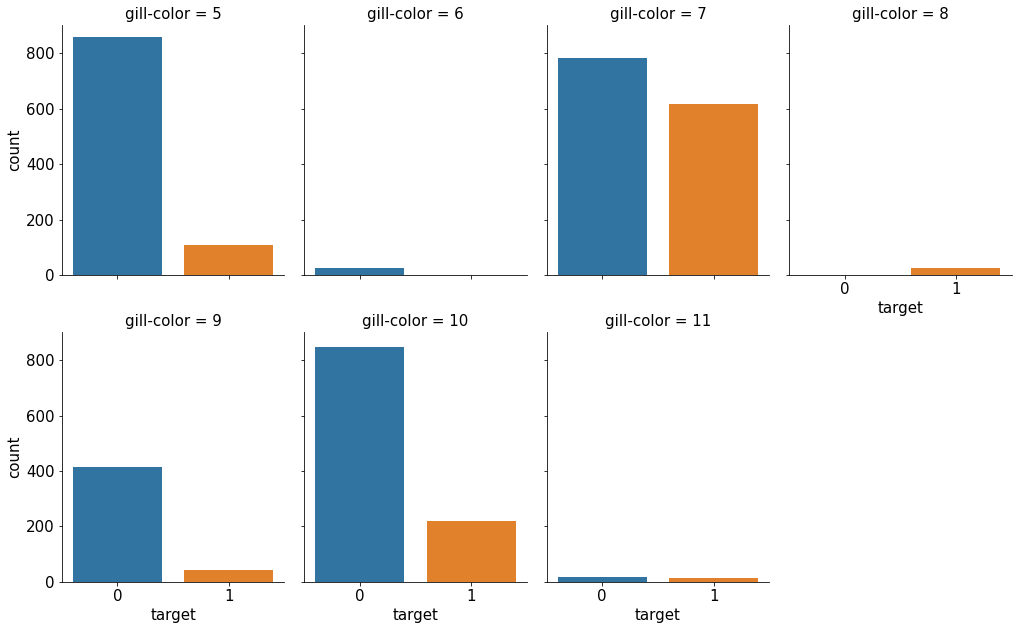

In [ ]:
new_var=df_imputed[['target', 'gill-color']]
new_var=new_var[new_var['gill-color']>4]

sns.factorplot('target', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);


In [ ]:
df_imputed[['target', 'bruises']].groupby(['bruises'], as_index=False).mean().sort_values(by='target', ascending=False)

,bruises,target
0,0,0.690347
1,1,0.186775


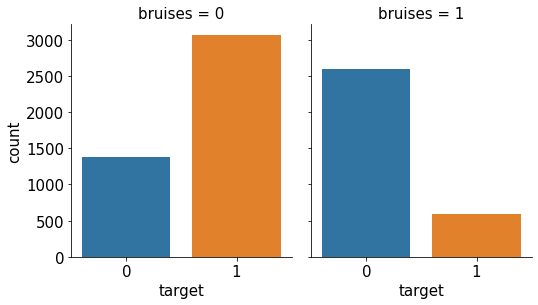

In [ ]:
new_var = df_imputed[['target', 'bruises']]
sns.factorplot('target', col='bruises', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);


### Checking The Outliers

 Before passing our data to Machine Learning algorithms we should make sure our data does not have any outliers.We will take a look at the boxplot of all our features in the dataset to check if there are some outliers in each of these columns or not. 


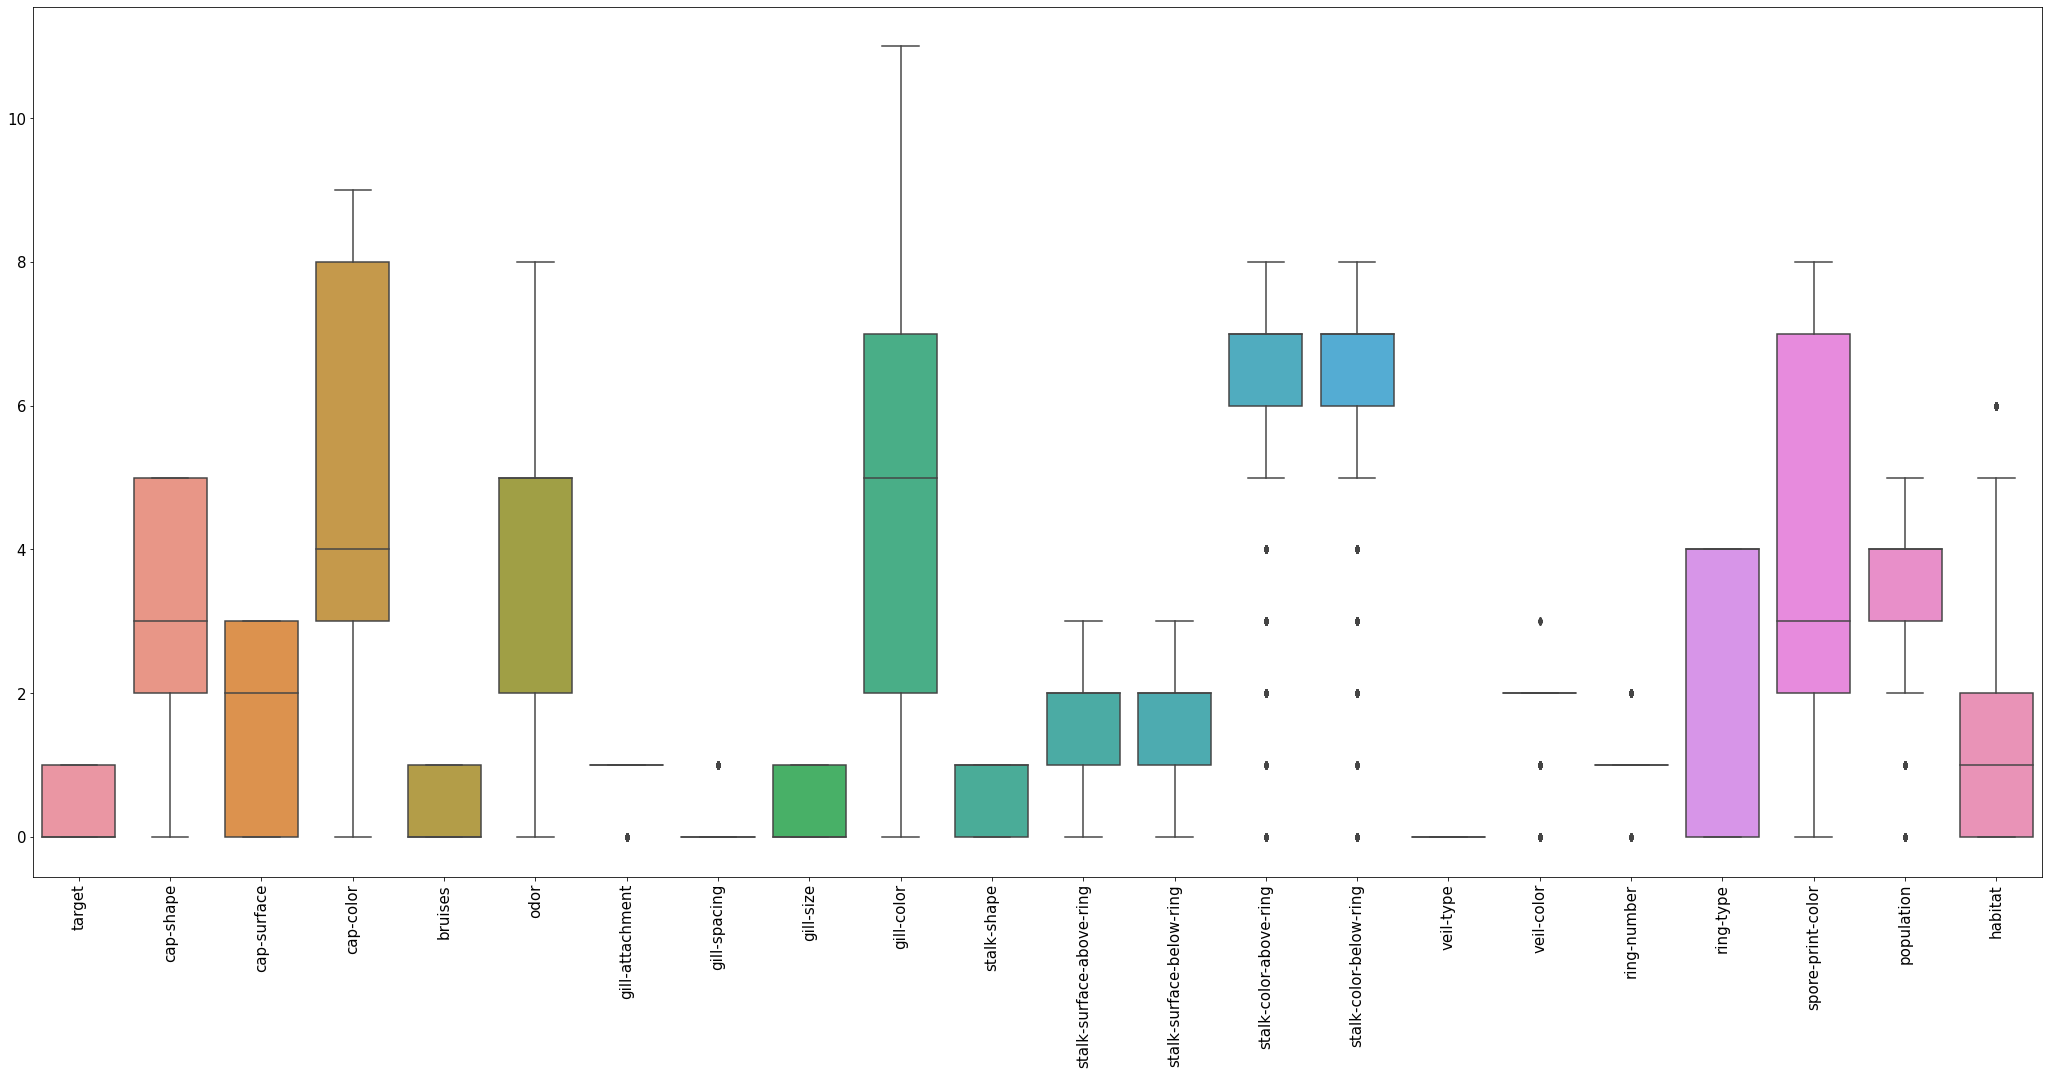

In [ ]:
# To check for outliers, we are plotting a box-whisker plot.
plt.figure(figsize=(36,16), facecolor='w')
sn.boxplot(data=df_imputed)
plt.xticks(rotation = 90)
plt.show()

As we can see in the figure above these features are contaning outliers: 
1. **'stalk-color-above-ring'**
2. **'stalk-color-below-ring'**
3. **'population'**


Here we wrote some function to help us to find the outliers of each of the columns. 

In [ ]:
# This function given a dataset and a column will return 
# the lower bound and upper bound of the values in that column

# The values that are not in this bound will be considered as outliers

#length of whiskers in a box plot:
#The whiskers indicate the largest/lowest points inside the range defined by 1st or 3rd quartile plus 1.5 times IQR. 
#The upper whisker is the largest observation that is <= 3rd quartile + 1.5 * iqr
#The lower whisker is the smallest observation that is => 1rd quartile - 1.5 * iqr
def outlier_bound(data, column):
  q1= np.percentile(data[column], 25)
  q3= np.percentile(data[column], 75)
  iqr=q3-q1
  upper_whisker = q3 + 1.5*(iqr)
  lower_whisker = q1 - 1.5*(iqr)
 
  return [round(lower_whisker, 2), round(upper_whisker, 2)] 

# This function given a dataset and a column in that dataset will return 
# the records that have outliers in that column 
def outliers_info(data, column):

  lower_whisker, upper_whisker = outlier_bound(data, column)
  print(f"Lower-bound: \'{lower_whisker}\', Upper-bound: \'{upper_whisker}\'")
  print('-'*30)
  outliers = data[(data[column]<lower_whisker) | (data[column]>upper_whisker) ] 
  print(f'Number of outliers in \'{column}\' Column is : \'{len(outliers)}\' \n\n')
  return outliers

### **'stalk-color-above-ring'**

We will take a look at the outliers in **'stalk-color-above-ring'** column. 

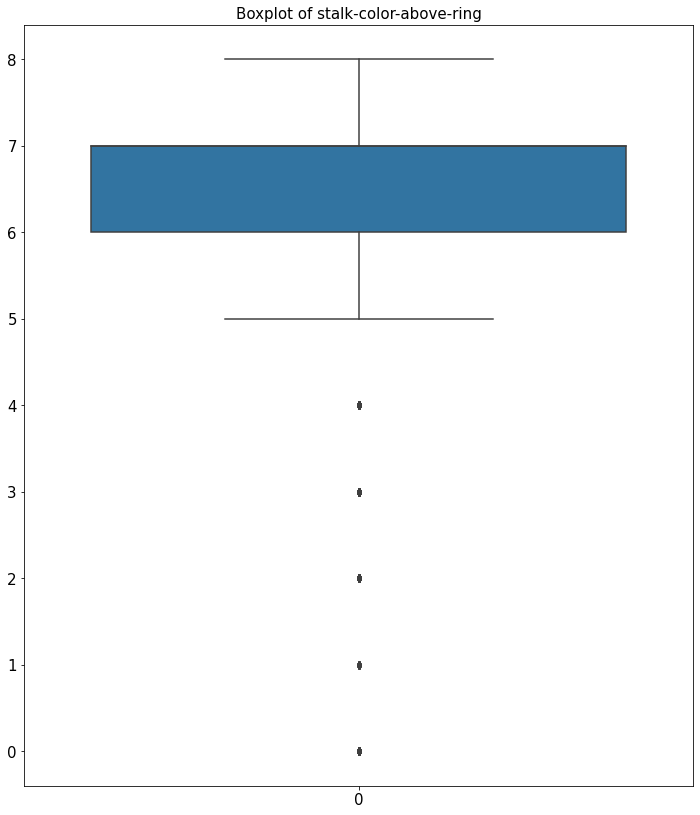

In [ ]:
# To check for outliers, we are plotting a box-whisker plot.
plt.figure(figsize=(12,14), facecolor='w')
plt.title('Boxplot of stalk-color-above-ring', fontsize = 15)
sn.boxplot(data=df_imputed['stalk-color-above-ring'])

Here we will show the records that have outliers in this column. 

In [ ]:
outliers = outliers_info(df_imputed, 'stalk-color-above-ring')
outliers.target.value_counts()

Lower-bound: '4.5', Upper-bound: '8.5'
------------------------------
Number of outliers in 'stalk-color-above-ring' Column is : '1469' 




1    839
0    630
Name: target, dtype: int64

### **'stalk-color-below-ring'**

We will take a look at the outliers in **'stalk-color-below-ring'** column. 

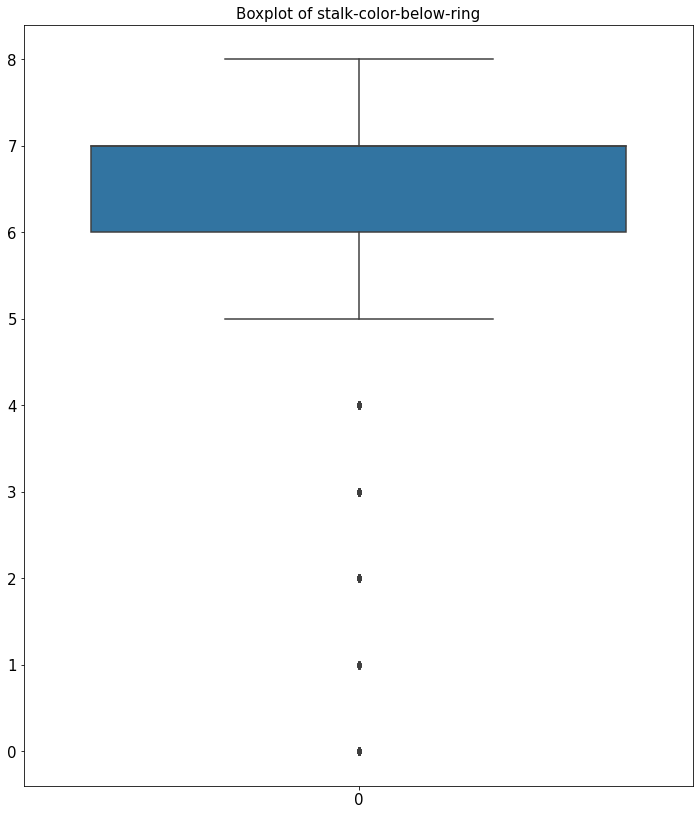

In [ ]:
# To check for outliers, we are plotting a box-whisker plot.
plt.figure(figsize=(12,14), facecolor='w')
plt.title('Boxplot of stalk-color-below-ring', fontsize = 15)
sn.boxplot(data=df_imputed['stalk-color-above-ring'])

In [ ]:
outliers = outliers_info(df_imputed, 'stalk-color-below-ring')
outliers.target.value_counts()

Lower-bound: '4.5', Upper-bound: '8.5'
------------------------------
Number of outliers in 'stalk-color-below-ring' Column is : '1545' 




1    861
0    684
Name: target, dtype: int64

### **'population'**

We will take a look at the outliers in **'population'** column. 

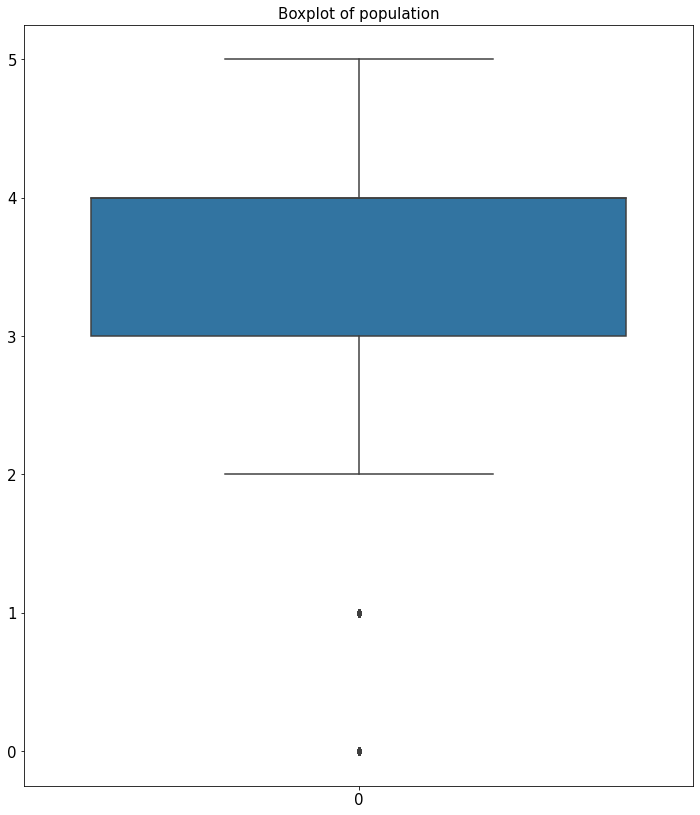

In [ ]:
# To check for outliers, we are plotting a box-whisker plot.
plt.figure(figsize=(12,14), facecolor='w')
plt.title('Boxplot of population', fontsize = 15)
sn.boxplot(data=df_imputed['population'])

Here we will show the records that have outliers in this column. 


In [ ]:
outliers = outliers_info(df_imputed, 'population')
outliers.target.value_counts()

Lower-bound: '1.5', Upper-bound: '5.5'
------------------------------
Number of outliers in 'population' Column is : '630' 




0    594
1     36
Name: target, dtype: int64

**Observation:**<br>
From the generated boxplots we can conclude:
- We have outliers in the following columns: 
1. **'stalk-color-above-ring'**
2. **'stalk-color-below-ring'**
3. **'population'**

We have two most used approaches to handle the outliers: 
1. **Removing** the records that are containing outliers. <br/>
2. **Winsorization** which tries to set the outliers to the nearest value bounds. 

Our approach would be the second approach because by dropping we will lose approximately 20% of our data that may be useful for us.


# 3. Feature Engineering

Feature engineering refers to a process of selecting and transforming features in our dataset when creating a predictive model using machine learning.

Therefore, we have to extract the features from the __raw dataset__  that we have. Otherwise, it will be hard to gain good insights in our dataset. 
There would be some strategies to apply.

## Dropping useless features
As we **mentioned in the data exploration** section these two features **(veil-type, Unnamed: 0)**, don't participate much enough to distinquish between the two classes of our target. <br/>

Therefore, we can safely drop these two features.

In [ ]:
df_imputed.drop(["veil-type"], axis = 1, inplace = True)
df_imputed.drop(["gill-attachment"], axis = 1, inplace = True)


Check if these two columns were deleted or not. 

In [ ]:
df_imputed.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,0,0,4,1,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,0,4,1,2,2,7,7,2,1,0,3,0,1


## Feature importance

 Setting X and y axis and splitting the data into train and test respectively.

In [ ]:
from sklearn.model_selection import train_test_split
X = df_imputed.drop(['target'], axis=1)  
y = df_imputed["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36, test_size=0.25)   

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

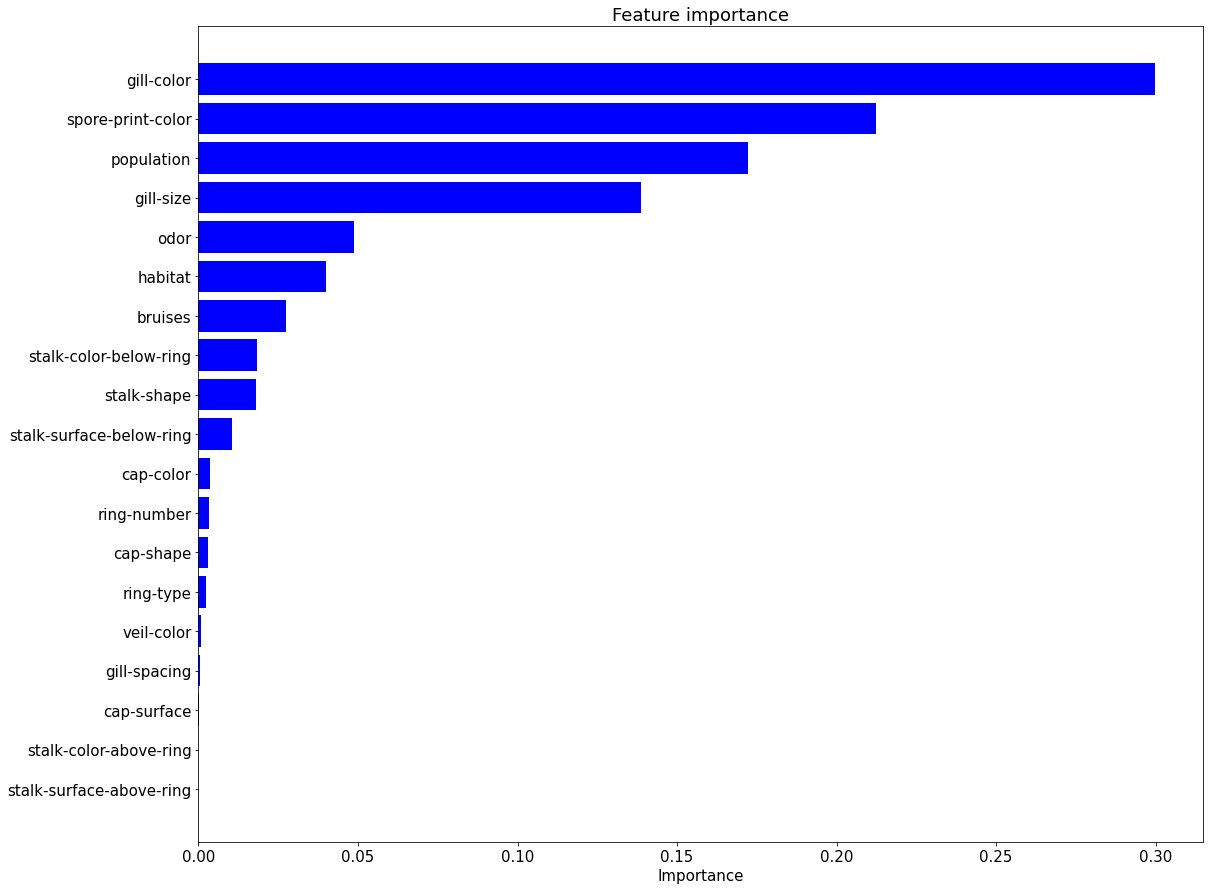

In [ ]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(18,15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="blue")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

By all methods examined before the feature that is most important is "gill-color".

## Handle Outliers

In [ ]:
df = df_imputed.drop(columns=['target'], axis=1)

This function given a dataset, tries to **winsorize** the outliers in the numerical columns. 

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from scipy.stats.mstats import winsorize

# insorizing is a technique to deal with outliers and is named after Charles Winsor. In effect, Winsorization clips outliers to given percentiles in a symmetric fashion. For instance, we can clip to the 5th and 95th percentile. SciPy has a winsorize() function, which performs this procedure.
def outlier_winsorization(df):

  for column in df.columns:
    lower, upper = outlier_bound(df, column)

    limit_lower = df[(df[column] < lower)].shape[0] / df.shape[0]
    limit_upper = df[(df[column] > upper)].shape[0] / df.shape[0]

    df[column] = winsorize(df[column], limits=[limit_lower, limit_upper])
  
  return df

# 4. Learning and Model Selection

A Machine Learning pipeline is a way to automate the workflow that takes to produce a Machine Learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

For any Machine Learning task, testing is an important phase to realize how good our predictive model is. As we do not have any separate testing dataset we need to use some dataset entries to perform the evaluation task.

The way in which we use different methods to train our model is in the following:

For __Logistic Regression__
- Train a model using training set
- Analyse the model performance on `training set`
- Analyse the model performance on `test set`
- Perform __hyperparameter tuning__ to find the best model using different paragemters
- Analyse the `best model` outcome of hp-tuning method and cross_validation on training set
- Analyse the `best model` outcome of hp-tuning method and cross_validation on test set

In [ ]:
# Separating target feature from the dataset. 
y = df_imputed['target']
X = df_imputed.drop(columns=['target'], axis=1)
# X = pd.DataFrame(X)


In [ ]:
from sklearn.model_selection import train_test_split
import random


# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 21)

In this part, we will perform two models : 

  -   [1. Logistic Regression](#LR)
  -   [2. Naive Bayes](#NB)

But before we need to define some functions for our pipeline. 

## Method I: Logistic Regression<font><a name=LR></a>

### LR: Pipleline and Prediction

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('scaler',MaxAbsScaler()), 
                           ('model', LogisticRegression())
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f2eecaecdd0>)),
                ('scaler', MaxAbsScaler()), ('model', LogisticRegression())])

In [ ]:
y_pred_lr = pipeline.predict(X_test)

### LR: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix Logistic Regression\n')

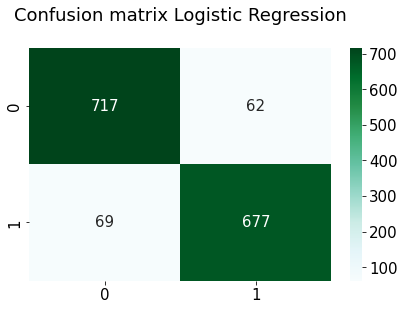

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_lr)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       779
           1       0.92      0.91      0.91       746

    accuracy                           0.91      1525
   macro avg       0.91      0.91      0.91      1525
weighted avg       0.91      0.91      0.91      1525



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_lr)

0.9139587427340339

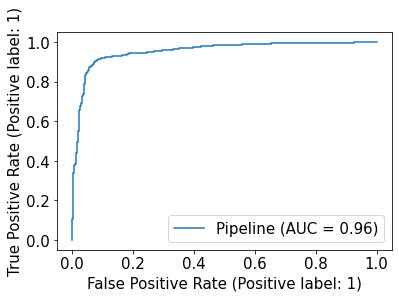

In [ ]:
metrics.plot_roc_curve(pipeline, X_test, y_test) 
plt.show()

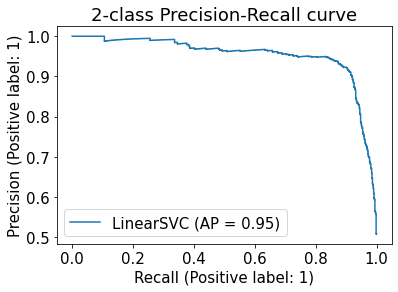

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    pipeline, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

The weights given to each of the features by **Linear Logistic Regression.**

In [ ]:
coefs = pipeline['model'].coef_.flatten()
columns = list(X_train.columns)

for i in range(8):
    print((coefs[i] , columns[i])) 

(-0.13628599729498805, 'cap-shape')
(1.3078143546831764, 'cap-surface')
(-0.6529720717389796, 'cap-color')
(-0.575023708814116, 'bruises')
(-2.797006552496927, 'odor')
(0.0, 'gill-spacing')
(3.5320279248645727, 'gill-size')
(-2.1614665146668566, 'gill-color')


The weights given to each of the features by **Linear Logistic Regression.**

### LR: Hyperparameter Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


'''
C: regularization parameter: 
penalty: tradeoff parameter: to weight regulatization penalties
 - C=0 => no regularization at all
 - C>0 and alpha=1 L1-regularization only => penalty = 'l1' 
 - C>0 and alpha=0 L2-regularization only => penalty = 'l2'

solver: Algorithm to use in the optimization problem. 
 - small datasets => ‘liblinear’
 - large datasets => ‘sag’ and ‘saga’

summarized from this link and sckit-learn official website.
https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

fit_intercept: Intercept (a.k.a. bias) added to the decision function.
max_iter: Maximum number of iterations taken for the solvers to converge.

'''

params = {
   'model__C': np.logspace(-4, 4, 6),
   'model__penalty': ['none', 'l1', 'l2', 'elasticnet'],
   'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
   'model__fit_intercept': [True, False],
   'model__max_iter': [100, 200, 500],
  }

hp_tuning = GridSearchCV(pipeline, params, scoring='accuracy', cv=5)
hp_tuning.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % hp_tuning.best_score_)
print(hp_tuning.best_params_)

Best parameter (CV score=0.899):
{'model__C': 0.15848931924611143, 'model__fit_intercept': True, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}


In [ ]:
report = pd.DataFrame(columns=['C', 'penalty', 'solver', 'fit_intercept', 'max_iter', 'score'])

for mean, params in zip(hp_tuning.cv_results_['mean_test_score'], hp_tuning.cv_results_['params']):
  report=report.append({
      'C'            : params['model__C'],
      'penalty'      : params['model__penalty'],
      'solver'       : params['model__solver'],
      'fit_intercept': params['model__fit_intercept'],
      'max_iter'     : params['model__max_iter'],
      'score'        : mean
  }, ignore_index=True)

report = report.sort_values(by = "score", ascending=False)
report

,C,penalty,solver,fit_intercept,max_iter,score
289,0.158489,l1,saga,True,500,0.899180
269,0.158489,l1,saga,True,200,0.899180
249,0.158489,l1,saga,True,100,0.899180
292,0.158489,l2,liblinear,True,500,0.898689
272,0.158489,l2,liblinear,True,200,0.898689
...,...,...,...,...,...,...
715,10000.000000,elasticnet,newton-cg,False,500,NaN
716,10000.000000,elasticnet,lbfgs,False,500,NaN
717,10000.000000,elasticnet,liblinear,False,500,NaN
718,10000.000000,elasticnet,sag,False,500,NaN


### LR: Detailed Classification report

In [ ]:
print("_________________Detailed classification report_________________\n")
print("The model is trained on the development set.")
print("The scores are computed on the evaluation set.\n")

print("Let See the result on the Test set\n")

y_pred = hp_tuning.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


_________________Detailed classification report_________________

The model is trained on the development set.
The scores are computed on the evaluation set.

Let See the result on the Test set

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       779
           1       0.92      0.91      0.91       746

    accuracy                           0.91      1525
   macro avg       0.91      0.91      0.91      1525
weighted avg       0.91      0.91      0.91      1525



## Method II: Naive Bayes<font><a name=NB></a>

### NB: Pipleline and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('model', BernoulliNB())
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f2eecaecdd0>)),
                ('model', BernoulliNB())])

In [ ]:
y_pred_nb = pipeline.predict(X_test)

### NB: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix Naive Bayes\n')

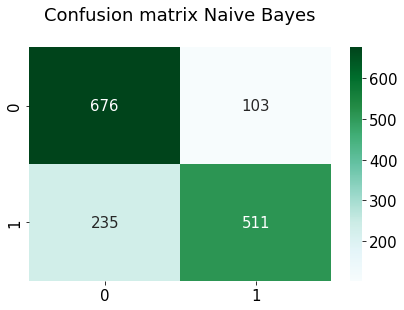

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_nb)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Naive Bayes\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       779
           1       0.83      0.68      0.75       746

    accuracy                           0.78      1525
   macro avg       0.79      0.78      0.78      1525
weighted avg       0.79      0.78      0.78      1525



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_nb)

0.7763828996410465

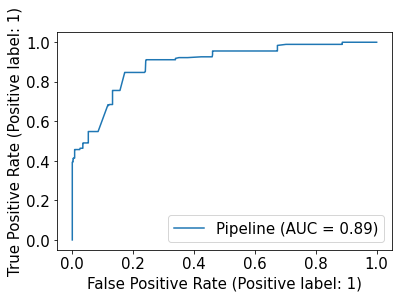

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(pipeline, X_test, y_test) 

plt.show()


## Method III: Random Forest<font><a name=RF></a>

### RF: Pipleline and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('model', RandomForestClassifier(n_estimators=100, random_state=42))
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f2eecaecdd0>)),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_rf = pipeline.predict(X_test)

### RF: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix Random Forest\n')

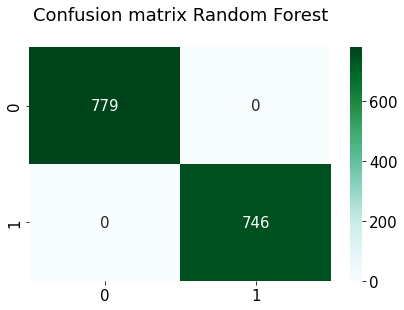

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_rf)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Random Forest\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       779
           1       1.00      1.00      1.00       746

    accuracy                           1.00      1525
   macro avg       1.00      1.00      1.00      1525
weighted avg       1.00      1.00      1.00      1525



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_rf)

1.0

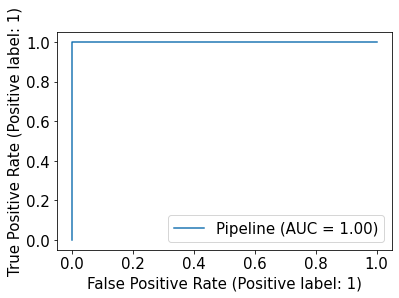

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(pipeline, X_test, y_test) 

plt.show()


## Method IIII: Support_Vector_Machine<font><a name=SVM></a>

### SVM: Pipleline and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('model', SVC())
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f2eecaecdd0>)),
                ('model', SVC())])

In [ ]:
y_pred_svm = pipeline.predict(X_test)

### SVM: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix SVM\n')

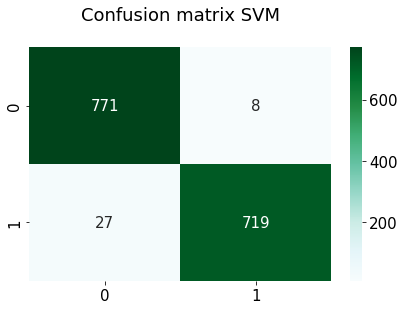

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_svm)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix SVM\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       779
           1       0.99      0.96      0.98       746

    accuracy                           0.98      1525
   macro avg       0.98      0.98      0.98      1525
weighted avg       0.98      0.98      0.98      1525



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_svm)

0.9767686970647047

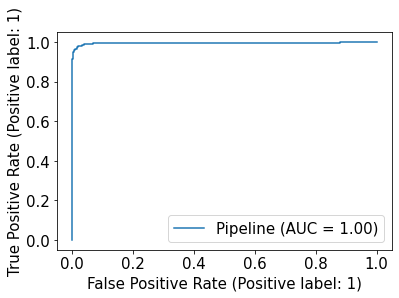

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(pipeline, X_test, y_test) 

plt.show()
